In [2]:
# Bibliotecas requeridas
# !pip install opencv-python torch torchvision segment-anything

cpu


(np.float64(-0.5), np.float64(499.5), np.float64(280.5), np.float64(-0.5))

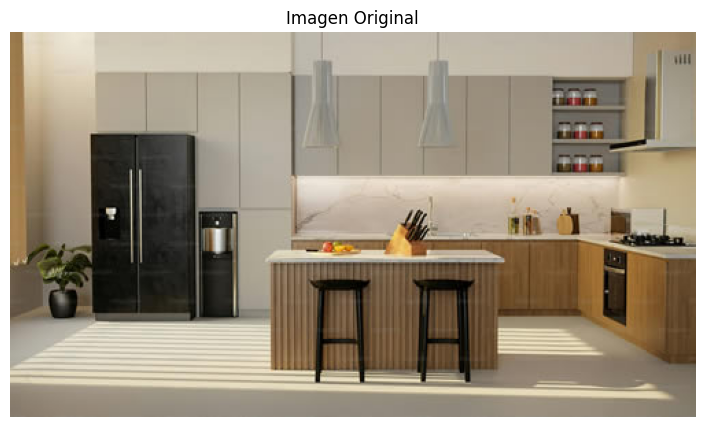

In [31]:
# Librerías y Variables Generales
import cv2 as cv
import torch
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

# Ruta a la imagen
image_path = "Test05.jpg"

# Carga el modelo SAM
# model_type = "vit_h"
# model_type = "vit_l"
model_type = "vit_b"

# Ruta al modelo SAM
# model_path = "C:\\SW\\Checkpoints\\sam_vit_h_4b8939.pth"
# model_path = "C:\\SW\\Checkpoints\\sam_vit_l_0b3195.pth"
model_path = "C:\\SW\\Checkpoints\\sam_vit_b_01ec64.pth"

# Dispositivo a utilizar (CPU o GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Carga la imagen
image = cv.imread(image_path)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

print(device)

plt.figure(figsize=(10,5))
plt.imshow(image)
plt.title("Imagen Original")
plt.axis('off')

In [33]:
sam = sam_model_registry[model_type](checkpoint=model_path)
sam.to(device)
predictor = SamPredictor(sam)

In [34]:
# Define las coordenadas del cuadro delimitador (ejemplo)
x1 = 0    # Coordenada x de la esquina superior izquierda
y1 = 0    # Coordenada y de la esquina superior izquierda
y2,x2,su = image.shape  # Coordenada x de la esquina inferior derecha
# y2 = 500  # Coordenada y de la esquina inferior derecha

# Realiza la segmentación
predictor.set_image(image)
input_box = np.array([x1, y1, x2, y2])  # Coordenadas del cuadro delimitador
masks, _, _ = predictor.predict(
    box=input_box,
    multimask_output=True,
)

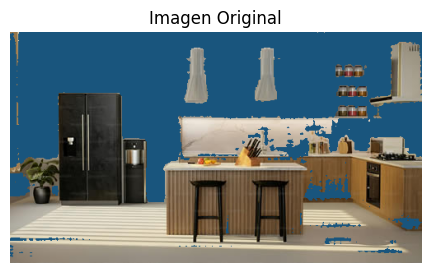

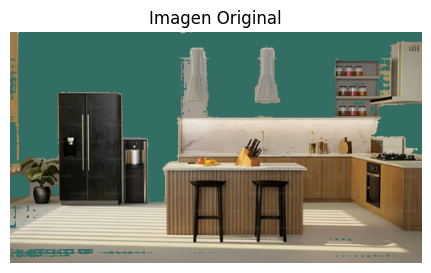

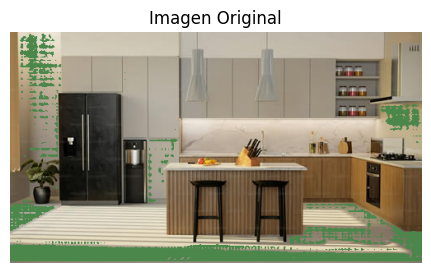

In [41]:
# Muestra las máscara
n=0
for mask in masks:
    n = n + 25
    image_with_mask = image.copy()
    image_with_mask[mask] = [0+n, 60+n, 150-n]  # Color verde para la máscara
    plt.figure(figsize=(6,3))
    plt.imshow(image_with_mask)
    plt.title("Imagen Original")
    plt.axis('off')
cv.waitKey(0)
cv.destroyAllWindows()